In [2]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import scanpy as sc
import seaborn as sns
import squidpy as sq
import numpy as np

from PIL import Image
import networkx as nx
import matplotlib.cm as cmx
import matplotlib.colors as colors

import ncem

usr = !echo $USER
base_path = '.'
base_path_out = '.'

grid_search_dir = '.'
datadir = '.'
targetpath = '.'
configpath = '.'
outdir = base_path_out + '/results/'
figdir = outdir+'/figures/'

sc.logging.print_version_and_date()
sc.settings.verbosity = 0
sc.settings.figdir = figdir


# remove later
dir_data = "/storage/groups/ml01/workspace/anna.schaar/tissue/data/"

Running Scanpy 1.7.2, on 2021-06-28 14:44.


# Load data

In [3]:
interpreter = ncem.interpretation.interpreter.InterpreterGraph()
interpreter.get_data(
    data_path=dir_data + '/busch/',
    data_origin='jarosch',
    radius=80,
    node_label_space_id='type',
    node_feature_space_id='standard',
    merge_node_types_predefined=True
)
print('\n Celldata metadata:', interpreter.data.celldata.uns['metadata'])

Loading data from raw files
registering celldata


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)
  0%|          | 0/2 [00:00<?, ?it/s]

collecting image-wise celldata
adding graph-level covariates


100%|██████████| 2/2 [00:00<00:00, 10.88it/s]

Loaded 2 images with complete data from 1 patients over 11321 cells with 19 cell features and 12 distinct celltypes.
Mean of mean node degree per images across images: 18.522793

 Celldata metadata: {'lateral_resolution': 0.5, 'fn': 'raw_inflamed_colon_1.h5ad', 'image_col': 'Annotation', 'pos_cols': ['X', 'Y'], 'cluster_col': 'celltype_Level_2', 'cluster_col_preprocessed': 'celltype_Level_2_preprocessed', 'patient_col': None}


# Supp. Fig. 1: Cell-type centric summary statistics per data set. 

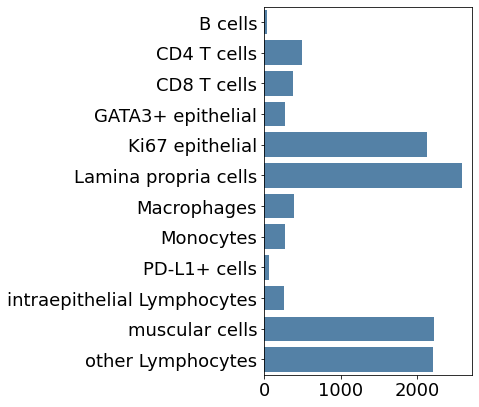

In [6]:
plt.ioff()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 6))
sns.barplot(
    y=interpreter.data.celldata.obs.celltype_Level_2_preprocessed.value_counts().index,
    x=list(interpreter.data.celldata.obs.celltype_Level_2_preprocessed.value_counts()),
    color='steelblue',
    ax=ax
)
ax.grid(False)
#ax.set_yticks([])
plt.tight_layout()
plt.show()

0.0
1.0277843237036042
2.0687580050480765
5.883873096223624
19.52279334540473
104.03451859527686
1182.610210062652
5660.5


/mnt/home/icb/anna.schaar/git/ncem/ncem/data.py:105: MatplotlibDeprecationWarning: The 'basey' parameter of __init__() has been renamed 'base' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.set_yscale("log", basey=10)


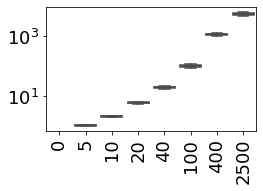

In [4]:
plt.rcParams.update({'font.size': 18})
interpreter.data.plot_degree_vs_dist(
    max_distances=[0, 10, 20, 40, 80, 200, 800, 5000],
    lateral_resolution=0.5,
)

# Supp. Fig. 2: Variance decomposition in spatial omics data sets.

100%|██████████| 2/2 [00:06<00:00,  3.03s/it]


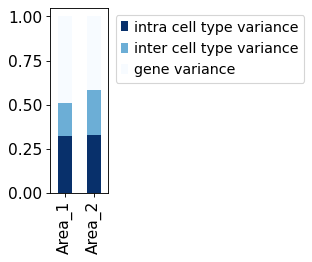

In [3]:
var_decomp = interpreter.data.compute_variance_decomposition()
interpreter.data.variance_decomposition(
    var_decomp, 
    panel_width=4,
    multiindex=False
)

In [4]:
var_decomp.mean(axis=0)[['intra cell type variance', 'inter cell type variance', 'gene variance']]

intra cell type variance    0.325813
inter cell type variance    0.218986
gene variance               0.455201
dtype: float32

# Supp. Fig. 6: Normalised contact frequencies of cell-types in spatial neighborhoods

100%|██████████| 2/2 [00:01<00:00,  1.10it/s]
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


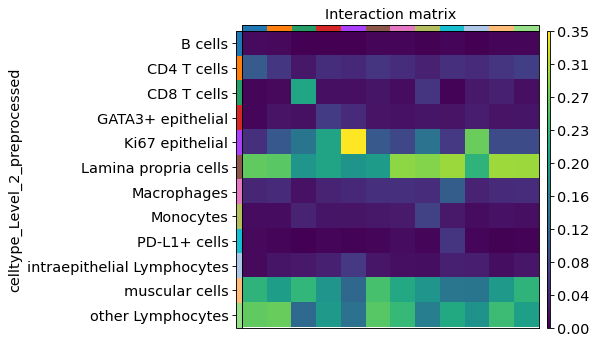

In [5]:
interpreter.data.celldata_interaction_matrix(
    figsize=(4,4),
    fontsize=13
)

# Supp. Fig. 7: Ligand–receptor permutation test. 

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/omnipath/_core/requests/_utils.py:155: FutureWarning: The default value of regex will change from True to False in a future version.
  _split_unique_join(data.str.replace(r"[-\w]*:?(\d+)", r"\1")), func=func
Variable names are not unique. To make them unique, call `.var_names_make_unique`.


n cells: 11321


  0%|          | 0/1000 [00:00<?, ?permutation/s]

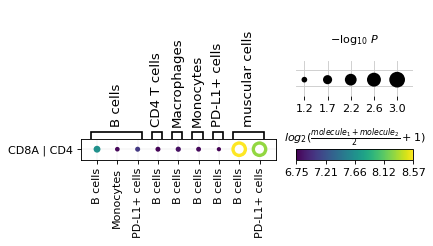

Variable names are not unique. To make them unique, call `.var_names_make_unique`.


In [6]:
hgnc_names = [
    'CD14', 
    'MS4A1', 
    'IL2RA', 
    'CD3G', 
    'CD4', 
    'PTPRC',
    'PTPRC',
    'PTPRC',
    'CD68', 
    'CD8A', 
    'KRT5', # 'KRT1', 'KRT14'
    'FOXP3', 
    'GATA3', 
    'MKI67', 
    'Nuclei',
    'PDCD1', 
    'CD274', 
    'SMN1', 
    'VIM'
]
adata = interpreter.data.ligrec(
    hgnc_names=hgnc_names,
    seed=10,
    fontsize=12,
    width=2.
)

# Supp. Fig. 8: Attributing cell heterogeneity to niche composition in Cd8 Tcells in inflamed colon. 

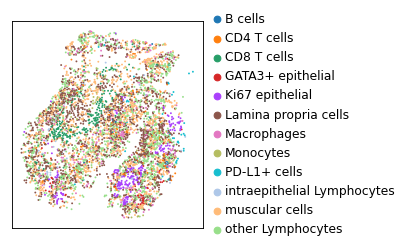

In [7]:
interpreter.data.spatial(
    image_key= "Area_1",
    fontsize=12,
    copy=False,
    panel_width=5,
    panel_height=5
)

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


n cells:  234
CD8 T cells 0    74
CD8 T cells 1    58
CD8 T cells 2    41
CD8 T cells 3    37
CD8 T cells 4    24
Name: CD8 T cells_substates, dtype: int64


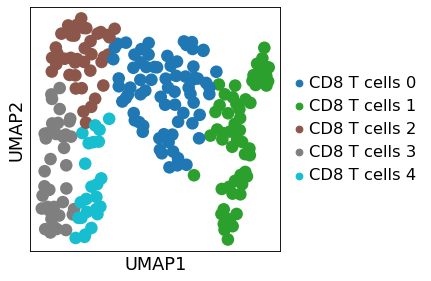

In [8]:
adata = interpreter.data.umap(
    image_key= "Area_1",
    target_cell_type='CD8 T cells',
    n_neighbors=22,
    n_pcs=None,
    fontsize=16,
    panel_width=4,
    panel_height=4,
    palette='tab10'
)

/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1094: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if not is_categorical(df_full[k]):
/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


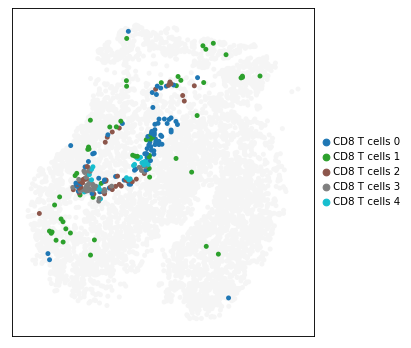

In [9]:
interpreter.data.spatial_substates(
    adata,
    image_key= "Area_1",
    target_cell_type='CD8 T cells',
    panel_width=5,
    panel_height=5,
    fontsize=10,
    spot_size=50
)

In [10]:
filter_titles = [
    'B cells',
    'CD4 T cells',
    'CD8 T cells',
    'GATA3+ epithelial',
    'Ki67 epithelial',
    'Lamina propria cells',
    'Macrophages',
    'Monocytes',
    'intraepithelial Lymphocytes',
    'muscular cells',
    'other Lymphocytes'
]

adata_img, adata, log_pval, fold_change = interpreter.data.compute_cluster_enrichment(
    image_key=['Area_1'],
    target_cell_type='CD8 T cells',
    clip_pvalues=-5,
    n_neighbors=22,
    n_pcs=None,
    filter_titles=filter_titles
)

100%|██████████| 16/16 [00:03<00:00,  5.19it/s]

n cells:  234
CD8 T cells 0    74
CD8 T cells 1    58
CD8 T cells 2    41
CD8 T cells 3    37
CD8 T cells 4    24
Name: CD8 T cells_substates, dtype: int64


/home/icb/anna.schaar/miniconda3/lib/python3.8/site-packages/anndata/_core/anndata.py:1192: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  if is_string_dtype(df[key]) and not is_categorical(df[key])
... storing 'Annotation' as categorical
... storing 'source type B cells' as categorical
... storing 'source type CD4 T cells' as categorical
... storing 'source type CD8 T cells' as categorical
... storing 'source type GATA3+ epithelial' as categorical
... storing 'source type Ki67 epithelial' as categorical
... storing 'source type Lamina propria cells' as categorical
... storing 'source type Macrophages' as categorical
... storing 'source type Monocytes' as categorical
... storing 'source type PD-L1+ cells' as categorical
... storing 'source type intraepithelial Lymphocytes' as categorical
... storing 'source type muscular cells' as categorical
... storing 'source type other Lymphocytes' as categorical


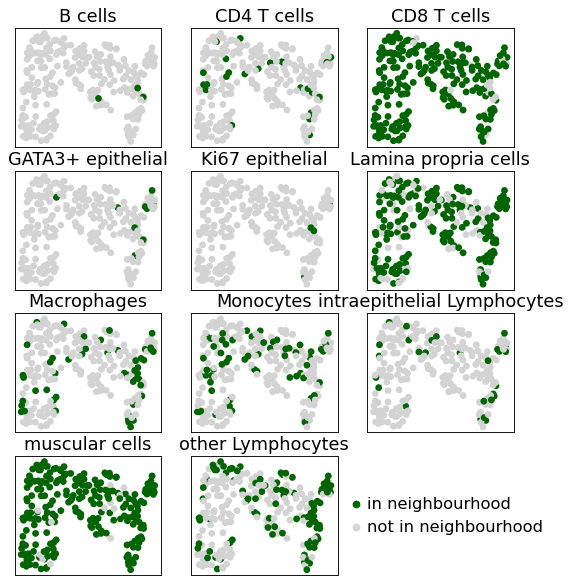

In [11]:
for i, x in enumerate(filter_titles):
    adata.uns[f"source type {x}_colors"] = ['darkgreen', 'lightgrey']
sc.set_figure_params(scanpy=True, fontsize=16)
plt.ioff()
fig, axs = plt.subplots(
    nrows=4, ncols=3, figsize=(8,9), )
N = len(filter_titles)
axs = axs.flat
for ax in axs[N:]:
    ax.remove()
ax = axs[:N]

for i, x in enumerate(filter_titles[:-1]):
    sc.pl.umap(
        adata,
        color=f"source type {x}",
        title=x,
        show=False,
        size=150,
        legend_loc='None',
        ax=ax[i]
    )
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
sc.pl.umap(
    adata,
    color=f"source type {filter_titles[-1]}",
    title=filter_titles[-1],
    show=False,
    size=150,
    ax=ax[N-1]
)
ax[N-1].set_xlabel('')
ax[N-1].set_ylabel('')
# Save, show and return figure.
plt.show()

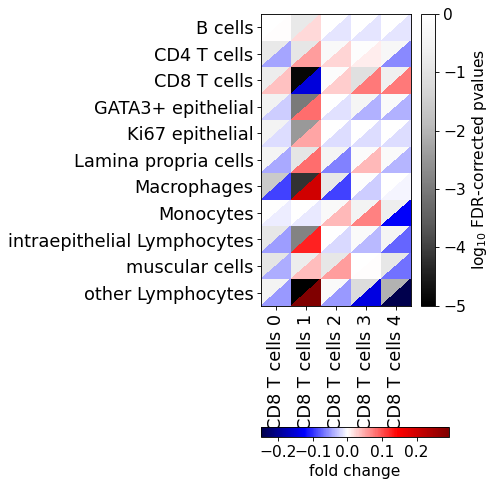

In [12]:
interpreter.data.cluster_enrichment(
    pvalues=log_pval, 
    fold_change=fold_change,
    fontsize=14,
    pad=0.25,
    panel_width=3,
    panel_height=8,
)

# Supp. Fig. 13: Distributional characteristics of gene expression measurements of single cells from spatial molecular profiling assays.

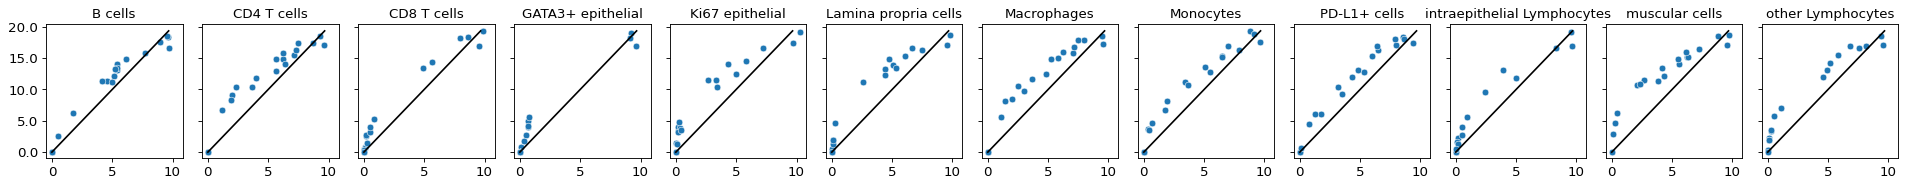

In [13]:
interpreter.data.noise_structure(panel_height=2.5, fontsize=12)